In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import find_peaks
from scipy.stats import linregress
import numpy as np

def f(X, A, B):
    '''
    Y = AX + B
    '''
    return A * X + B

In [2]:
df = pd.read_csv('co2.csv', delimiter=',', decimal='.', skiprows=[i for i in range(5)])

In [3]:
df.columns = [0, 1, 2]

In [4]:
w = df[0]
I = df[2]

peaks = find_peaks(I)[0]
no_dub = np.array([])
th = 1.5
for i in range(len(peaks)-1):
    if (np.abs(peaks[i]-peaks[i+1]) < 1.5):
        no_dub = np.append(no_dub, peaks[i])
peaks = no_dub
w_peak = np.array([])
I_peak = np.array([])
for i in no_dub:
    w_peak = np.append(w_peak, w[i])
    I_peak = np.append(I_peak, I[i])

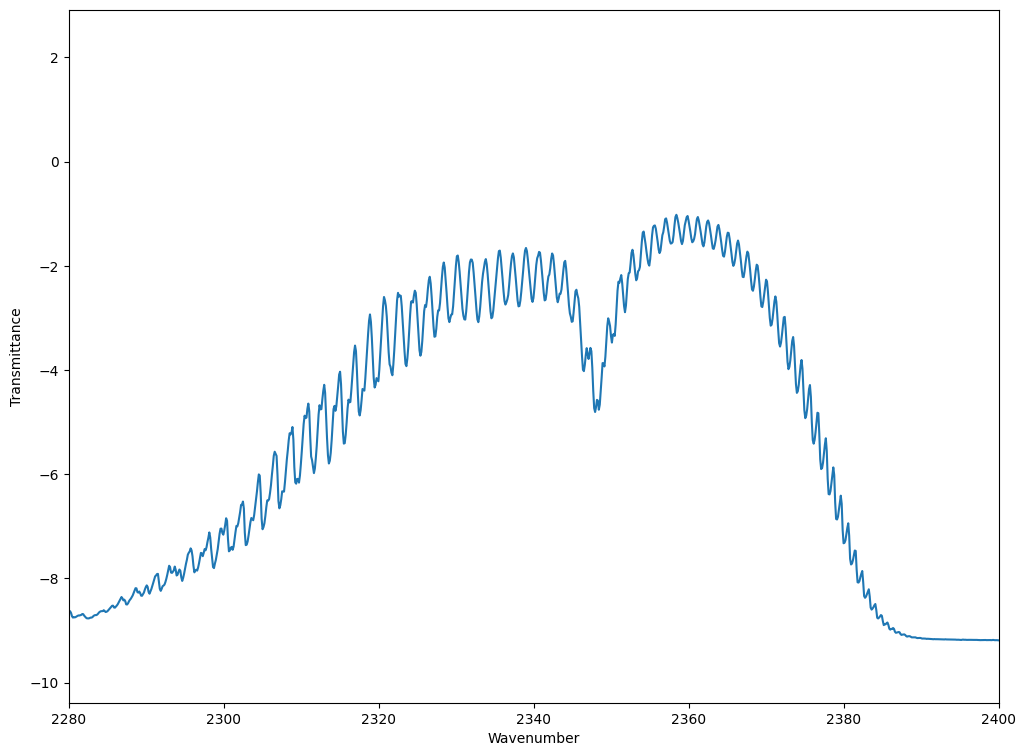

In [7]:
figure(figsize=(12, 9), dpi=100)
plt.plot(w, I)
plt.xlim(2280, 2400)
plt.scatter(w_peak, I_peak, color='red', marker='.')
for peak in peaks:
    plt.annotate(f'{w[peak]:.2f}', xy=(w[peak], I[peak]), rotation=90)
plt.xlabel('Wavenumber')
plt.ylabel('Transmittance')
plt.savefig('co2_ir.jpg', dpi=500)

## Расчёты

In [3]:
F_p =  np.array([[4.2, 7.0, 10.4, 13.4, 16.6],
                [1, 2, 3, 4, 5]])
F_pp = np.array([[3.6, 7.3, 10.2, 13.2, 16.2],
                [1, 2, 3, 4, 5]])

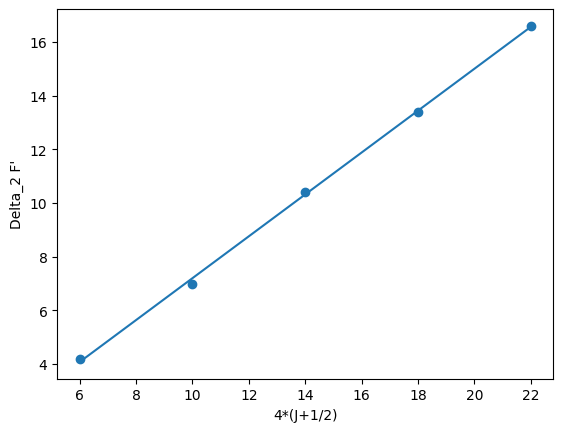

In [22]:
p_pars = linregress( (F_p[1]+0.5)*4, 
           F_p[0] )
j_fine = np.linspace(min((F_p[1]+0.5)*4), max((F_p[1]+0.5)*4), 100)
plt.scatter( (F_p[1]+0.5)*4,
            F_p[0] )
plt.plot(j_fine, f(j_fine, p_pars[0], p_pars[1]))
plt.xlabel('4*(J+1/2)')
plt.ylabel('Delta_2 F\'')
plt.savefig('dfp.png', dpi=500)

In [23]:
linregress( (F_p[1]+0.5)*4, 
           F_p[0] )[0]

0.7800000000000001

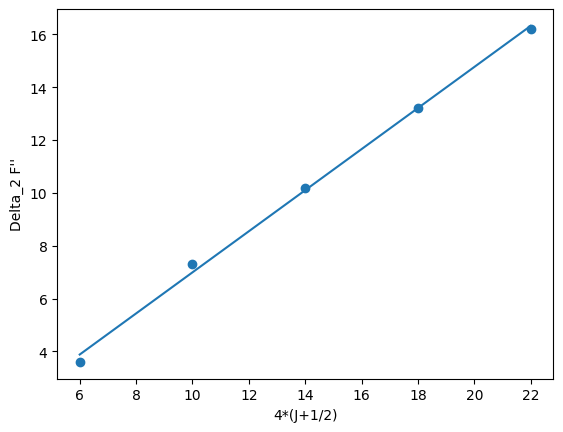

In [24]:
pp_pars = linregress( (F_pp[1]+0.5)*4, 
           F_pp[0] )
j_fine = np.linspace(min((F_pp[1]+0.5)*4), max((F_pp[1]+0.5)*4), 100)

plt.scatter( (F_pp[1]+0.5)*4,
            F_pp[0] )
plt.plot(j_fine, f(j_fine, pp_pars[0], pp_pars[1]))
plt.xlabel('4*(J+1/2)')
plt.ylabel('Delta_2 F\'\'')
plt.savefig('dfpp.png', dpi=500)

In [25]:
linregress( (F_pp[1]+0.5)*4, 
           F_pp[0] )[0]

0.7775